<a href="https://colab.research.google.com/github/Piroon1123/choikeonwoo/blob/main/AI_06_%EC%B5%9C%EA%B1%B4%EC%9A%B0_CP2_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **0. 데이터 불러오기**

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install surprise

     |████████████████████████████████| 11.8 MB 21.8 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1623231 sha256=6c1419e3e20afdda96dccf139c736a24b104438126951c35a97d660d83e4eb5c
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [3]:
import pandas as pd
import numpy as np

from surprise import SVD
from surprise import Dataset
from surprise import dump
from surprise import accuracy
from surprise import Reader
from collections import defaultdict
from surprise import Reader, Dataset, SVD, accuracy
from surprise.model_selection import GridSearchCV, cross_validate

user_url = '/content/drive/MyDrive/Colab Notebooks/user_data.xlsx'
dfs_user = pd.read_excel(user_url)
policy_url = '/content/drive/MyDrive/Colab Notebooks/policy_final.xlsx'
dfs_policy = pd.read_excel(policy_url)
user = dfs_user.drop(columns=['Unnamed: 0'])
policy = dfs_policy.drop(columns=['Unnamed: 0'])

In [5]:
# 지역(시도) & 지역(시군구) 코드 데이터

seoul_url = '/content/drive/MyDrive/Colab Notebooks/city/seoul.xlsx'
seoul = pd.read_excel(seoul_url)
busan_url = '/content/drive/MyDrive/Colab Notebooks/city/busan.xlsx'
busan = pd.read_excel(busan_url)
ccn_url = '/content/drive/MyDrive/Colab Notebooks/city/ccn.xlsx'
ccn = pd.read_excel(ccn_url)
ccs_url = '/content/drive/MyDrive/Colab Notebooks/city/ccs.xlsx'
ccs = pd.read_excel(ccs_url)
daegu_url = '/content/drive/MyDrive/Colab Notebooks/city/daegu.xlsx'
daegu = pd.read_excel(daegu_url)
gangwon_url = '/content/drive/MyDrive/Colab Notebooks/city/gangwon.xlsx'
gangwon = pd.read_excel(gangwon_url)
gyeongi_url = '/content/drive/MyDrive/Colab Notebooks/city/gyeongi.xlsx'
gyeongi = pd.read_excel(gyeongi_url)
incheon_url = '/content/drive/MyDrive/Colab Notebooks/city/incheon.xlsx'
incheon = pd.read_excel(incheon_url)
jrn_url = '/content/drive/MyDrive/Colab Notebooks/city/jrn.xlsx'
jrn = pd.read_excel(jrn_url)
jrs_url = '/content/drive/MyDrive/Colab Notebooks/city/jrs.xlsx'
jrs = pd.read_excel(jrs_url)
ksn_url = '/content/drive/MyDrive/Colab Notebooks/city/ksn.xlsx'
ksn = pd.read_excel(ksn_url)
kss_url = '/content/drive/MyDrive/Colab Notebooks/city/kss.xlsx'
kss = pd.read_excel(kss_url)
gwangju_url = '/content/drive/MyDrive/Colab Notebooks/city/gwangju.xlsx'
gwangju = pd.read_excel(gwangju_url)
daejun_url = '/content/drive/MyDrive/Colab Notebooks/city/daejun.xlsx'
daejun = pd.read_excel(daejun_url)
ulsan_url = '/content/drive/MyDrive/Colab Notebooks/city/ulsan.xlsx'
ulsan = pd.read_excel(ulsan_url)

In [4]:
f_df=policy
final_svd_df=pd.DataFrame(columns=['userId','Policy_ID','score'])

In [6]:
# user_data 내 알아볼 유저 num 입력

num = input(int())
i = int(num)

11726


In [ ]:
# # 유저 데이터 확인

# n1 = user[user['num']==i]
# n1 = pd.DataFrame(n1)
# n1

In [7]:
def region_preprocessing (a,n1):

  # home1 코드화
  if n1.iloc[0]['home1_t'] == '서울' :
    n1.iloc[0]['home1_t'] = 'A01-01'

    for a in range (len(seoul)):
      if n1.iloc[0]['home1_b'] == seoul['city'][a]:
        n1.iloc[0]['home1_b'] = seoul['num'][a]

  elif n1.iloc[0]['home1_t'] == '부산' :
    n1.iloc[0]['home1_t'] = 'A01-02'

    for b in range (len(busan)):
      if n1.iloc[0]['home1_b'] == busan['city'][b]:
        n1.iloc[0]['home1_b'] = busan['num'][b]

  elif n1.iloc[0]['home1_t'] == '대구' :
      n1.iloc[0]['home1_t'] = 'A01-03'

      for c in range (len(daegu)):
        if n1.iloc[0]['home1_b'] == daegu['city'][c]:
          n1.iloc[0]['home1_b'] = daegu['num'][c]

  elif n1.iloc[0]['home1_t'] == '인천' :
      n1.iloc[0]['home1_t'] = 'A01-04'

      for d in range (len(incheon)):
        if n1.iloc[0]['home1_b'] == incheon['city'][d]:
          n1.iloc[0]['home1_b'] = incheon['num'][d]

  elif n1.iloc[0]['home1_t'] == '광주' :
      n1.iloc[0]['home1_t'] = 'A01-05'

      for e in range (len(gwangju)):
        if n1.iloc[0]['home1_b'] == gwangju['city'][e]:
          n1.iloc[0]['home1_b'] = gwangju['num'][e]


  elif n1.iloc[0]['home1_t'] == '대전' :
      n1.iloc[0]['home1_t'] = 'A01-06'

      for f in range (len(daejun)):
        if n1.iloc[0]['home1_b'] == daejun['city'][f]:
          n1.iloc[0]['home1_b'] = daejun['num'][f]

  elif n1.iloc[0]['home1_t'] == '울산' :
      n1.iloc[0]['home1_t'] = 'A01-07'

      for g in range (len(ulsan)):
        if n1.iloc[0]['home1_b'] == ulsan['city'][g]:
          n1.iloc[0]['home1_b'] = ulsan['num'][g]

  elif n1.iloc[0]['home1_t'] == '세종' :
      n1.iloc[0]['home1_t'] = 'A01-08'
      n1.iloc[0]['home1_b'] = '00'

  elif n1.iloc[0]['home1_t'] == '경기' :
      n1.iloc[0]['home1_t'] = 'A01-09'

      for h in range (len(gyeongi)):
        if n1.iloc[0]['home1_b'] == gyeongi['city'][h]:
          n1.iloc[0]['home1_b'] = gyeongi['num'][h]

  elif n1.iloc[0]['home1_t'] == '강원' :
      n1.iloc[0]['home1_t'] = 'A01-10'

      for i in range (len(gangwon)):
        if n1.iloc[0]['home1_b'] == gangwon['city'][i]:
          n1.iloc[0]['home1_b'] = gangwon['num'][i]

  elif n1.iloc[0]['home1_t'] == '충북' :
      n1.iloc[0]['home1_t'] = 'A01-11'

      for j in range (len(ccn)):
        if n1.iloc[0]['home1_b'] == ccn['city'][j]:
          n1.iloc[0]['home1_b'] = ccn['num'][j]

  elif n1.iloc[0]['home1_t'] == '충남' :
      n1.iloc[0]['home1_t'] = 'A01-12'

      for k in range (len(ccs)):
        if n1.iloc[0]['home1_b'] == ccs['city'][k]:
          n1.iloc[0]['home1_b'] = ccs['num'][k]

  elif n1.iloc[0]['home1_t'] == '전북' :
      n1.iloc[0]['home1_t'] = 'A01-13'

      for l in range (len(jrn)):
        if n1.iloc[0]['home1_b'] == jrn['city'][l]:
          n1.iloc[0]['home1_b'] = jrn['num'][l]

  elif n1.iloc[0]['home1_t'] == '전남' :
      n1.iloc[0]['home1_t'] = 'A01-14'

      for m in range (len(jrs)):
        if n1.iloc[0]['home1_b'] == jrs['city'][m]:
          n1.iloc[0]['home1_b'] = jrs['num'][m]

  elif n1.iloc[0]['home1_t'] == '경북' :
      n1.iloc[0]['home1_t'] = 'A01-15'

      for n in range (len(ksn)):
        if n1.iloc[0]['home1_b'] == ksn['city'][n]:
          n1.iloc[0]['home1_b'] = ksn['num'][n]

  elif n1.iloc[0]['home1_t'] == '경남' :
      n1.iloc[0]['home1_t'] = 'A01-16'

      for o in range (len(kss)):
        if n1.iloc[0]['home1_b'] == kss['city'][o]:
          n1.iloc[0]['home1_b'] = kss['num'][o]

  elif n1.iloc[0]['home1_t'] == '제주' :
      n1.iloc[0]['home1_t'] = 'A01-17'
      
      if n1.iloc[0]['home1_b'] == '제주시':
        n1.iloc[0]['home1_b'] = '00'

      elif n1.iloc[0]['home1_b'] == '서귀포시':
        n1.iloc[0]['home1_b'] = '01'  


  # home2 코드화

  if n1.iloc[0]['home2_t'] == '서울' :
    n1.iloc[0]['home2_t'] = 'A01-01'

    for a in range (len(seoul)):
      if n1.iloc[0]['home2_b'] == seoul['city'][a]:
        n1.iloc[0]['home2_b'] = seoul['num'][a]

  elif n1.iloc[0]['home2_t'] == '부산' :
    n1.iloc[0]['home2_t'] = 'A01-02'

    for b in range (len(busan)):
      if n1.iloc[0]['home2_b'] == busan['city'][b]:
        n1.iloc[0]['home2_b'] = busan['num'][b]

  elif n1.iloc[0]['home2_t'] == '대구' :
      n1.iloc[0]['home2_t'] = 'A01-03'

      for c in range (len(daegu)):
        if n1.iloc[0]['home2_b'] == daegu['city'][c]:
          n1.iloc[0]['home2_b'] = daegu['num'][c]

  elif n1.iloc[0]['home2_t'] == '인천' :
      n1.iloc[0]['home2_t'] = 'A01-04'

      for d in range (len(incheon)):
        if n1.iloc[0]['home2_b'] == incheon['city'][d]:
          n1.iloc[0]['home2_b'] = incheon['num'][d]

  elif n1.iloc[0]['home2_t'] == '광주' :
      n1.iloc[0]['home2_t'] = 'A01-05'

      for e in range (len(gwangju)):
        if n1.iloc[0]['home2_b'] == gwangju['city'][e]:
          n1.iloc[0]['home2_b'] = gwangju['num'][e]


  elif n1.iloc[0]['home2_t'] == '대전' :
      n1.iloc[0]['home2_t'] = 'A01-06'

      for f in range (len(daejun)):
        if n1.iloc[0]['home2_b'] == daejun['city'][f]:
          n1.iloc[0]['home2_b'] = daejun['num'][f]

  elif n1.iloc[0]['home2_t'] == '울산' :
      n1.iloc[0]['home2_t'] = 'A01-07'

      for g in range (len(ulsan)):
        if n1.iloc[0]['home2_b'] == ulsan['city'][g]:
          n1.iloc[0]['home2_b'] = ulsan['num'][g]

  elif n1.iloc[0]['home2_t'] == '세종' :
      n1.iloc[0]['home2_t'] = 'A01-08'
      n1.iloc[0]['home2_b'] = '00'

  elif n1.iloc[0]['home2_t'] == '경기' :
      n1.iloc[0]['home2_t'] = 'A01-09'

      for h in range (len(gyeongi)):
        if n1.iloc[0]['home2_b'] == gyeongi['city'][h]:
          n1.iloc[0]['home2_b'] = gyeongi['num'][h]

  elif n1.iloc[0]['home2_t'] == '강원' :
      n1.iloc[0]['home2_t'] = 'A01-10'

      for i in range (len(gangwon)):
        if n1.iloc[0]['home2_b'] == gangwon['city'][i]:
          n1.iloc[0]['home2_b'] = gangwon['num'][i]

  elif n1.iloc[0]['home2_t'] == '충북' :
      n1.iloc[0]['home2_t'] = 'A01-11'

      for j in range (len(ccn)):
        if n1.iloc[0]['home2_b'] == ccn['city'][j]:
          n1.iloc[0]['home2_b'] = ccn['num'][j]

  elif n1.iloc[0]['home2_t'] == '충남' :
      n1.iloc[0]['home2_t'] = 'A01-12'

      for k in range (len(ccs)):
        if n1.iloc[0]['home2_b'] == ccs['city'][k]:
          n1.iloc[0]['home2_b'] = ccs['num'][k]

  elif n1.iloc[0]['home2_t'] == '전북' :
      n1.iloc[0]['home2_t'] = 'A01-13'

      for l in range (len(jrn)):
        if n1.iloc[0]['home2_b'] == jrn['city'][l]:
          n1.iloc[0]['home2_b'] = jrn['num'][l]

  elif n1.iloc[0]['home2_t'] == '전남' :
      n1.iloc[0]['home2_t'] = 'A01-14'

      for m in range (len(jrs)):
        if n1.iloc[0]['home2_b'] == jrs['city'][m]:
          n1.iloc[0]['home2_b'] = jrs['num'][m]

  elif n1.iloc[0]['home2_t'] == '경북' :
      n1.iloc[0]['home2_t'] = 'A01-15'

      for n in range (len(ksn)):
        if n1.iloc[0]['home2_b'] == ksn['city'][n]:
          n1.iloc[0]['home2_b'] = ksn['num'][n]

  elif n1.iloc[0]['home2_t'] == '경남' :
      n1.iloc[0]['home2_t'] = 'A01-16'

      for o in range (len(kss)):
        if n1.iloc[0]['home2_b'] == kss['city'][o]:
          n1.iloc[0]['home2_b'] = kss['num'][o]

  elif n1.iloc[0]['home2_t'] == '제주' :
      n1.iloc[0]['home2_t'] = 'A01-17'
      
      if n1.iloc[0]['home2_b'] == '제주시':
        n1.iloc[0]['home2_b'] = '00'

      elif n1.iloc[0]['home2_b'] == '서귀포시':
        n1.iloc[0]['home2_b'] = '01'

  # 한자리수 앞에 누락되는 0 보정 & 문자화 (1)

  if len(str(n1.iloc[0]['home1_b'])) == 1:
    n1.iloc[0]['home1_b'] = '0' + str(n1.iloc[0]['home1_b'])

  else :
    n1.iloc[0]['home1_b'] = str(n1.iloc[0]['home1_b'])

  # 한자리수 앞에 누락되는 0 보정 & 문자화 (2)

  if len(str(n1.iloc[0]['home2_b'])) == 1:
    n1.iloc[0]['home2_b'] = '0' + str(n1.iloc[0]['home2_b'])

  else :
    n1.iloc[0]['home2_b'] = str(n1.iloc[0]['home2_b'])

  n1['area_code1'] = n1['home1_t'] + '-' + n1['home1_b']
  n1['area_code2'] = n1['home2_t'] + '-' + n1['home2_b']  

  policy_all_area = policy[policy['code_region']=='A01-00'] # 전국 대상인 정책
  policy_loc1 = policy[policy['code_region'] == n1.iloc[0]['home1_t']] # 해당 구역 시도 대상 정책
  policy_loc2 = policy[policy['code_region'] == n1.iloc[0]['home2_t']] # 해당 구역 시도 대상 정책
  policy_aim1 = policy[policy['code_region'] == n1.iloc[0]['area_code1']] # 해당 구역 대상 정책
  policy_aim2 = policy[policy['code_region'] == n1.iloc[0]['area_code2']] # 해당 구역 대상 정책

  # home1, home2 가 같을 경우와 다를 경우 구분

  if n1.iloc[0]['area_code1'] == n1.iloc[0]['area_code2'] :
    policy1 = pd.concat([policy_all_area, policy_loc1, policy_aim1])

  elif n1.iloc[0]['area_code1'] != n1.iloc[0]['area_code2'] :
    policy1 = pd.concat([policy_all_area, policy_loc1, policy_loc2, policy_aim1, policy_aim2])


  allgender = policy1[policy1['code_gender']=='A02-00'] # 성별무관
  man = policy1[policy1['code_gender']=='A02-01'] # 남자
  woman = policy1[policy1['code_gender']=='A02-02'] # 여자    

  if n1.iloc[0]['sex'] == 'M':
    policy2 = pd.concat([allgender, man])

  elif n1.iloc[0]['sex'] == 'F':
    policy2 = pd.concat([allgender, woman])

  allschool = policy2[policy2['code_graduate'] == 'A03-00'] # 학력무관
  highschool = policy2[policy2['code_graduate'] == 'A03-01'] # 고등학교 졸업
  incollege = policy2[policy2['code_graduate'] == 'A03-02'] # 대학(원) 재학
  recollege = policy2[policy2['code_graduate'] == 'A03-03'] # 대학(원) 휴학
  gracollege = policy2[policy2['code_graduate'] == 'A03-04'] # 대학(원) 졸업

  if n1.iloc[0]['study'] == '고등학교 졸업':
    policy3 = pd.concat([allschool, highschool])

  elif n1.iloc[0]['study'] == '대학(원) 재학':
    policy3 = pd.concat([allschool, incollege])

  elif n1.iloc[0]['study'] == '대학(원) 휴학':
    policy3 = pd.concat([allschool, recollege])

  elif n1.iloc[0]['study'] == '대학(원) 졸업':
    policy3 = pd.concat([allschool, gracollege])

  elif n1.iloc[0]['study'] == '기타':
    policy3 = policy2

  # 직업을 여러개 체크했을 경우, 그에 맞게 검색필터 적용

  if n1.iloc[0]['job'].find(',') != -1 or n1.iloc[0]['job'].find('/') != -1 :
    jobs = n1.iloc[0]['job'].replace(',', '/')
    job_list = jobs.split('/')

  elif n1.iloc[0]['job'].find(',') == -1 and n1.iloc[0]['job'].find('/') == -1 :
    job_list = []
    job_list.append(n1.iloc[0]['job'])


  all_job = policy3[policy3['code_job'] == 'A04-00'] # 직업무관
  college = policy3[policy3['code_job'] == 'A04-01'] # 대학(원)생
  seeker = policy3[policy3['code_job'] == 'A04-02'] # 구직자
  employee = policy3[policy3['code_job'] == 'A04-03'] # 근로자
  changup = policy3[policy3['code_job'] == 'A04-04'] # 예비창업자
  ss_business = policy3[policy3['code_job'] == 'A04-05'] # 소상공인
  s_business = policy3[policy3['code_job'] == 'A04-06'] # 중소기업
  freelancer = policy3[policy3['code_job'] == 'A04-07'] # 프리랜서

  policy4 = all_job

  if '대학(원)생' in job_list :
    policy4 = pd.concat([policy4, college])

  if '구직자' in job_list :
    policy4 = pd.concat([policy4, seeker])

  if '근로자' in job_list:
    policy4 = pd.concat([policy4, employee])

  if '예비창업자' in job_list:
    policy4 = pd.concat([policy4, changup])

  if '소상공인' in job_list:
    policy4 = pd.concat([policy4, ss_business])

  if '중소기업' in job_list:
    policy4 = pd.concat([policy4, s_business])

  if '프리랜서' in job_list:
    policy4 = pd.concat([policy4, freelancer])

  elif '기타' in job_list:
    policy4 = policy3 

  all_own = policy4[policy4['code_family'] == 'A05-00'] # 가구원 무관
  owner1 = policy4[policy4['code_family'] == 'A05-01'] # 무주택 세대주
  owner2 = policy4[policy4['code_family'] == 'A05-03'] # 주택 세대주
  ownee1 = policy4[policy4['code_family'] == 'A05-02'] # 무주택 세대원
  ownee2 = policy4[policy4['code_family'] == 'A05-04'] # 주택 세대원

  if n1.iloc[0]['house_owner'] == '세대주':
    policy5 = pd.concat([all_own, owner1, owner2])

  elif n1.iloc[0]['house_owner'] == '세대원':
    policy5 = pd.concat([all_own, ownee1, ownee2])    

  all_ma = policy5[policy5['code_marriage'] == 'A06-00'] # 결혼 무관
  no_ma = policy5[policy5['code_marriage'] == 'A06-01'] # 미혼
  yes_ma = policy5[policy5['code_marriage'] == 'A06-02'] # 기혼
  cut_ma = policy5[policy5['code_marriage'] == 'A06-03'] # 이혼
  re_ma = policy5[policy5['code_marriage'] == 'A06-04'] # 재혼

  if n1.iloc[0]['marrige'] == '미혼':
    policy6 = pd.concat([all_ma, no_ma, cut_ma, re_ma])

  elif n1.iloc[0]['marrige'] == '기혼':
    policy6 = pd.concat([all_ma, yes_ma, cut_ma, re_ma])


  # 자녀상세를 여러개 체크했을 경우, 그에 맞게 검색필터 적용

  if n1.iloc[0]['mb_9'].find(',') != -1 or n1.iloc[0]['mb_9'].find('/') != -1 :
    sibling = n1.iloc[0]['mb_9'].replace(',', '/')
    sibling_list = sibling.split('/')

  elif n1.iloc[0]['mb_9'].find(',') == -1 and n1.iloc[0]['mb_9'].find('/') == -1 :
    sibling_list = []
    sibling_list.append(n1.iloc[0]['mb_9'])

  if n1.iloc[0]['mb_7'] == '없다' :
    n1['mb_7'] = 'A07-00'

  elif n1.iloc[0]['mb_7'] == '있다' :
    n1['mb_7'] = 'A07-01'

  nosib = policy6[policy6['code_children'] == 'A07-00'] # 자녀없음
  unknownsib = policy6[policy6['code_children'] == 'A07-01'] # 자녀 있음 - 무관
  baby = policy6[policy6['code_children'] == 'A07-01-00'] # 영유아
  kinder = policy6[policy6['code_children'] == 'A07-01-01'] # 유치원
  kid = policy6[policy6['code_children'] == 'A07-01-02'] # 어린이집
  schooler = policy6[policy6['code_children'] == 'A07-01-03'] # 초중고학생
  adult = policy6[policy6['code_children'] == 'A07-01-04'] # 성인

  policy7 = pd.DataFrame()

  if n1.iloc[0]['mb_7'] == 'A07-00':
    policy7 = nosib

  elif n1.iloc[0]['mb_7'] == 'A07-01':
    policy7 = pd.concat([policy7, unknownsib])
    if '영아' in sibling_list or '유아' in sibling_list :
      policy7 = pd.concat([policy7,baby, kinder, kid])

    if '초등학생' in sibling_list or '중학생' in sibling_list or '고등학생' in sibling_list :
      policy7 = pd.concat([policy7, schooler])

    if '성인' in sibling_list:
      policy7 = pd.concat([policy7, adult])

  # '/' 포함 value 분리되는 것 방지

  if n1.iloc[0]['mb_10'].find('/') != -1 :
    n1.iloc[0]['mb_10'].replace('/', '-')

  if n1.iloc[0]['illness'].find('/') != -1 :
    n1.iloc[0]['illness'].replace('/', '-')

  if n1.iloc[0]['mil_award'].find('/') != -1 :
    n1.iloc[0]['mil_award'].replace('/', '-')


  # mb_10 여러개 체크 시, 중복 선택될 수 있도록 체크

  if n1.iloc[0]['mb_10'].find(',') != -1 :
    mb10 = n1.iloc[0]['mb_10'].replace(',', '/')
    mb10_list = mb10.split('/')

  elif n1.iloc[0]['mb_10'].find(',') == -1 :
    mb10_list = []
    mb10_list.append(n1.iloc[0]['mb_10'])


  # illness

  if n1.iloc[0]['illness'].find(',') != -1 :
    ill = n1.iloc[0]['illness'].replace(',', '/')
    ill_list = ill.split('/')

  if n1.iloc[0]['illness'].find(',') == -1 :
    ill_list = []
    ill_list.append(n1.iloc[0]['illness'])

  # mil_award

  if n1.iloc[0]['mil_award'].find(',') != -1 :
    mil = n1.iloc[0]['mil_award'].replace(',', '/')
    mil_list = mil.split('/')

  if n1.iloc[0]['mil_award'].find(',') == -1 :
    mil_list = []
    mil_list.append(n1.iloc[0]['mil_award'])


  e1_0 = policy7[policy7['code_target'] == 'A12-00'] # 해당없음
  e1_2 = policy7[policy7['code_target'].str.startswith('A12-02')] # 농축수산인
  e1_4 = policy7[policy7['code_target'] == 'A12-04'] # 난임
  e1_5 = policy7[policy7['code_target'] == 'A12-05'] # 임신부
  e1_6 = policy7[policy7['code_target'] == 'A12-06'] # 출산후
  e1_9 = policy7[policy7['code_target'] == 'A12-09'] # 다문화 가정
  e1_10 = policy7[policy7['code_target'] == 'A12-10'] # 북한이탈주민
  e1_11 = policy7[policy7['code_target'] == 'A12-11'] # 한부모-조손 가정
  e1_12 = policy7[policy7['code_target'] == 'A12-12'] # 소년소녀가장
  e1_13 = policy7[policy7['code_target'] == 'A12-13'] # 다자녀 가정
  e1_14 = policy7[policy7['code_target'] == 'A12-14'] # 독거노인
  e1_15 = policy7[policy7['code_target'] == 'A12-15'] # 입양 가정
  e1_16 = policy7[policy7['code_target'] == 'A12-16'] # 외국인/재외국인
  e1_17 = policy7[policy7['code_target'] == 'A12-17'] # 한센인
  e1_18 = policy7[policy7['code_target'] == 'A12-18'] # 이산가족
  e1_19 = policy7[policy7['code_target'] == 'A12-19'] # 기관/시설

  # 장애인일때, illness 여부로 중증/경증 판단

  e1_1_0 = policy7[policy7['code_target'] == 'A12-01-00'] # 심한 중증
  e1_1_1 = policy7[policy7['code_target'] == 'A12-01-01'] # 심하지 않은 장애

  # 환자일때, illness 여부로 중증난치희귀질환자 / 요양치매환자 판단

  e1_3_0 = policy7[policy7['code_target'] == 'A12-03-00'] # 중증, 난치, 희귀 질환자
  e1_3_1 = policy7[policy7['code_target'] == 'A12-03-01'] # 요양, 치매 환자

  # 보훈대상 및 가족일때 mil_award 여부로 국가유공자 / 제대군인 판단

  e1_7 = policy7[policy7['code_target'] == 'A12-07'] # 국가유공자 #policy 8을 7로 바꿨는데 맞는지?
  e1_8 = policy7[policy7['code_target'] == 'A12-08'] # 제대 군인 #policy 8을 7로 바꿨는데 맞는지?

  # mb_10 / illness / mil_award 필터링

  policy8 = pd.DataFrame()
  if '저소득층' in mb10_list or '구호구제대상자' in mb10_list:
    policy8 = pd.concat([policy8, e1_0])

  if '장애인' in mb10_list:
    if '지체' in ill_list or '뇌병변' in ill_list or '자폐성' in ill_list or '간질' in ill_list or '심장' in ill_list or '장루' in ill_list or '간' in ill_list or '호흡기' in ill_list:
      policy8 = pd.concat([policy8, e1_1_0])

    if '한센' in ill_list or '한센병' in ill_list or '문둥병' in ill_list:
      policy8 = pd.concat([policy8, e1_1_17])

    if '지체' not in ill_list and '뇌병변' not in ill_list and '자폐성' not in ill_list and '간질' not in ill_list and '심장' not in ill_list and '장루' not in ill_list and '간' not in ill_list and '호흡기' not in ill_list and '한센' not in ill_list and '한센병' not in ill_list and '문둥병' not in ill_list :
      policy8 = pd.concat([policy8, e1_1_1])

  if '농축수산인' in mb10_list:
    policy8 = pd.concat([policy8, e1_2])

  if '환자' in mb10_list:
    if '요양' in ill_list or '치매' in ill_list or '알츠하이머' in ill_list or '노인' in ill_list :
      policy8 = pd.concat([policy8, e1_3_0])

    if '요양' not in ill_list and '치매' not in ill_list and '알츠하이머' in ill_list and '노인' not in ill_list :
      policy8 = pd.concat([policy8, e1_3_1])

  if '보훈대상 및 가족' in mb10_list :
    if '제대군인' not in mil_list:
      policy8 = pd.concat([policy8, e1_7])

    if '제대군인' in mil_list :
      policy8 = pd.concat([policy8, e1_8])

  if '다문화 가정' in mb10_list:
    policy8 = pd.concat([policy8, e1_9, e1_16])

  if '북한이탈주민' in mb10_list:
    policy8 = pd.concat([policy8, e1_10])

  if '한부모/조손 가정' in mb10_list:
    policy8 = pd.concat([policy8, e1_11])

  if '소년소녀가장' in mb10_list:
    policy8 = pd.concat([policy8, e1_12])

  if '다자녀 가정' in mb10_list:
    policy8 = pd.concat([policy8, e1_13])

  if '독거노인' in mb10_list:
    policy8 = pd.concat([policy8, e1_14])

  if '입양 가정' in mb10_list:
    policy8 = pd.concat([policy8, e1_15])

  if '외국인' in mb10_list:
    policy8 = pd.concat([policy8, e1_16])

  if '이산가족' in mb10_list:
    policy8 = pd.concat([policy8, e1_18])

  if '기관-시설' in mb10_list:
    policy8 = pd.concat([policy8, e1_19])

  elif '해당없음' in mb10_list:
    policy8 = policy7


  policy8 = policy8.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)

  # support 복수 선택 반영하도록 설정

  if n1.iloc[0]['support'].find(',') != -1 :
    supp = n1.iloc[0]['support'].replace(',', '/')
    supp_list = supp.split('/')

  if n1.iloc[0]['support'].find(',') == -1 :
    supp_list = []
    supp_list.append(n1.iloc[0]['support'])

  # mb_11 복수 선택 반영하도록 설정

  if n1.iloc[0]['mb_11'].find(',') != -1 :
    mb11 = n1.iloc[0]['mb_11'].replace(',', '/')
    mb11_list = mb11.split('/')

  if n1.iloc[0]['mb_11'].find(',') == -1 :
    mb11_list = []
    mb11_list.append(n1.iloc[0]['mb_11'])

  new_list = supp_list + mb11_list

  x1_0 = policy8[policy8['code_status'] == 'A13-00'] # 입대예정
  x1_1 = policy8[policy8['code_status'] == 'A13-01'] # 결혼예정
  x1_2 = policy8[policy8['code_status'] == 'A13-02'] # 은퇴예정
  x1_3 = policy8[policy8['code_status'] == 'A13-03'] # 개인교육지원
  x1_4 = policy8[policy8['code_status'] == 'A13-04'] # 개인금융지원
  x1_5 = policy8[policy8['code_status'] == 'A13-05'] # 기업교육지원
  x1_6 = policy8[policy8['code_status'] == 'A13-06'] # 기업금융지원
  x1_7 = policy8[policy8['code_status'] == 'A13-07'] # 폭력/범죄/중독지원
  x1_8 = policy8[policy8['code_status'] == 'A13-08'] # 자동차/교통지원

  # mb_11 여부로 필터링

  policy9 = pd.DataFrame()

  if '입대 예정' in new_list:
    policy9 = pd.concat([policy9, x1_0])

  if '결혼 예정' in new_list:
    policy9 = pd.concat([policy9, x1_1])

  if '은퇴 예정' in new_list:
    policy9 = pd.concat([policy9, x1_2])

  if '임신 예정' in new_list:
    policy9 = pd.concat([policy9, e1_4, e1_5]) # code-target 부분

  if '출생 예정' in new_list:
    policy9 = pd.concat([policy9, e1_6]) # code-target 부분

  if '제대 예정' in new_list:
    policy9 = pd.concat([policy9, e1_8]) # code-target 부분

  if '구직 예정' in new_list:
    policy9 = pd.concat([policy9, x1_3, x1_4])

  if '개인금융지원' in new_list :
    policy9 = pd.concat([policy9, x1_3])

  if '기업금융지원' in new_list:
    policy9 = pd.concat([policy9, x1_6])

  if '성인교육지원' in new_list :
    policy9 = pd.concat([policy9, x1_3, x1_5])

  if '교육지원(만8~19세)' in new_list :
    policy9 = pd.concat([policy9, x1_3])

  if '보육지원(만0~7세)' in new_list :
    policy9 = pd.concat([policy9, x1_3])

  if '주택-부동산 지원' in new_list :
    policy9 = pd.concat([policy9, x1_4])

  if '취업 지원' in new_list:
    policy9 = pd.concat([policy9, x1_3, x1_4])

  if '문화생활 지원' in new_list:
    policy9 = pd.concat([policy9, x1_4])

  if '의료 지원' in new_list:
    policy9 = pd.concat([policy9, x1_3, x1_4, x1_5])

  if '창업 지원' in new_list :
    policy9 = pd.concat([policy9, x1_3, x1_4, x1_5, x1_6])

  if '근로자 지원' in new_list:
    policy9 = pd.concat([policy9, x1_3, x1_4, x1_5, x1_6])

  elif '기타' in new_list and '해당없음' in new_list:
    policy9 = policy8


  policy9 = policy9.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)


  age_numm = n1.iloc[0]['age']
  age_numm = int(age_numm)
  if age_numm > 99: #수정
    age_numm=99

  xx = policy9[policy9['age_start'] <= age_numm] # 시작연령보다 크거나 같아야함
  yy = policy9[policy9['age_end'] >= age_numm] # 끝연령보다 작거나 같아야함
  xy = pd.concat([xx, yy])
  policy10 = xy[xy.duplicated()] # 둘 다 겹치는 부분 출력

  if n1.iloc[0]['income'].find('기초생활수급자') != -1 :
    a1 = policy10[policy10['income_first'] <= 30]
    a2 = pd.DataFrame()

  elif n1.iloc[0]['income'].find('중위소득 40% 이하') != -1 :
    a1 = policy10[policy10['income_first'] <= 40]
    a2 = policy10[policy10['income_last'] >= 0]

  elif n1.iloc[0]['income'].find('중위소득 40~60% 사이') != -1 :
    a1 = policy10[policy10['income_first'] <= 60]
    a2 = policy10[policy10['income_last'] >= 40]

  elif n1.iloc[0]['income'].find('중위소득 60~80% 사이') != -1 :
    a1 = policy10[policy10['income_first'] <= 80]
    a2 = policy10[policy10['income_last'] >= 60]

  elif n1.iloc[0]['income'].find('중위소득 80~100% 사이') != -1 :
    a1 = policy10[policy10['income_first'] <= 100]
    a2 = policy10[policy10['income_last'] >= 80]

  elif n1.iloc[0]['income'].find('중위소득 100% 이상') != -1 :
    a1 = pd.DataFrame()
    a2 = policy10[policy10['income_last'] >= 100]

  res = pd.concat([a1, a2])
  policy11 = res.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)

  policy12 = policy11.reset_index(drop=True)

  # 최종 - reset_index를 통해 for 문 사용 가능하게 만들고 난 후, 정책 아이디를 기준으로 겹치는 항목 제거

  policy_plus = policy12 #.drop_duplicates(['Policy_ID'])
  policy_plus = policy_plus.reset_index(drop=True)
    
  nsv = []
  if n1.iloc[0]['study'] == '기타':
    nsv.append('code_graduate')

  if n1.iloc[0]['job'] == '기타':
    nsv.append('code_job')

  if n1.iloc[0]['mb_10'] == '해당없음':
    nsv.append('code_target')

  if new_list == ['기타', '해당없음']:
    nsv.append('code_status')  

  index=['Policy_ID']
  no_effect_col=['code_apply_type']
  f_column=nsv+no_effect_col+index
  policy_plus=policy_plus[f_column]

  for i in policy_plus['Policy_ID']:
    for j in f_column:
      policy_plus[str(j)][policy_plus['Policy_ID']==int(i)]=",".join(map(str,policy_plus[policy_plus['Policy_ID']==int(i)][str(j)].unique())) #수정
      
  policy_plus.drop_duplicates()     
  return a, nsv , policy_plus

In [8]:
def popular_score(userid,policy_data):

  # index=['Policy_ID']
  # f_column=step_pass_columns+index

  # f_df = policy[f_column]
  # f_df = f_df[f_df['Policy_ID'].isin(filter_id)]

  f_df=policy_data

  f_df=f_df.fillna('not special')

  # 단독 cell 기준 중복 value들 제거
  for p in range((f_df.shape[1])-1):
    for q in range(f_df.shape[0]):
      k=f_df.iloc[q,p].split(',')
      result_A = []
      for i in k:
        if i not in result_A:
          result_A.append(i)
      result_A=','.join(result_A)
      f_df.iloc[q,p]=result_A   

  # 단독 cell 기준 normalize 계산해주기
  for i in f_df.columns.difference(['Policy_ID']).tolist():
    ref=f_df[i].str.split(',')
    ref=ref.apply(lambda x: pd.Series(x))

    c_list=[]
    for j in range(ref.shape[1]):
      c_list.append(ref.iloc[:,j])
    
    new=pd.concat(c_list)
    x=new.value_counts(normalize=True,dropna=True)
    B=x.to_dict()

  # 단독 cell에 있는 value 밀도확률 더해주기
    for k in range(ref.shape[1]):
      ref.iloc[:,k]=ref.iloc[:,k].map(B)
    
    ref['sum']=ref.iloc[:,:].sum(axis=1)

    f_df[i]=ref['sum']
  
  # 평균확률을 열 기준으로 빼주기 -> feature기준 보편성 점수 취득
  for i in range(0,f_df.shape[1]-1):
    x=len(f_df.iloc[:,i].unique())
    y=1/len(f_df.iloc[:,i].unique())
    f_df.iloc[:,i]=f_df.iloc[:,i]-y

  #main feature가 누군지를 알 수 있도록 연산하는 함수(상관관계 총합)
  import scipy.stats
  import math
  import numpy as np

  c=f_df.columns.difference(['Policy_ID']).tolist()

  feature_list={}
  for i in c:
    xx=0
    for j in range(0,f_df.shape[1]-1):
      y=scipy.stats.spearmanr(f_df[i], f_df.iloc[:,j]).correlation
      if np.isnan(y):
        y=0
      xx=xx+y
    feature_list[i]=float(xx)   
  
  # 내림차순 _ 상관관계 계수 합산 기준
  reverse_fl = sorted(feature_list.items(), reverse=True, key=lambda item: item[1])

  #1순위 주요변수 기준 상관관계 곱해주기

  first_imp=reverse_fl[0][0]

  for i in range(0,f_df.shape[1]-1):
    x=scipy.stats.spearmanr(f_df[first_imp], f_df.iloc[:,i]).correlation
    f_df.iloc[:,i]=f_df.iloc[:,i]*x #각 변수마다의 상관계수 곱해주기  

  f_df = f_df .fillna(0) # 값이 아예 없는 value는 0처리 (영향 파악 X)

  # 보편 점수 합산
  f_df['score']=f_df.iloc[:,:-1].sum(axis=1)


  result=f_df.sort_values('score',ascending=False)  

  #상위7개 정책ID 보여주기
  my_POLICY_ID=list(dict.fromkeys(result['Policy_ID']))

  # svd 진행 df 
  svd_df=result[['Policy_ID','score']]
  svd_df['userId']=userid
  svd_df=svd_df[['userId','Policy_ID','score']]  
  svd_df.drop_duplicates()

  return my_POLICY_ID[0:7] , svd_df


In [9]:
for a in user['num'][5000:5010]:
  n1=user[user['num']==a]
  n1=pd.DataFrame(n1)

  i, nsv , first_step_policy = region_preprocessing (a,n1) 

  second_step_policy , svd_df =popular_score(i,first_step_policy )

  final_svd_df=pd.concat([final_svd_df , svd_df])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:134: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.p

In [10]:
final_svd_df.shape

(9772, 3)

In [11]:
final_svd_df.head(10)

,userId,Policy_ID,score
213,11052,81997,0.230635
492,11052,963,0.230440
716,11052,563,0.229856
218,11052,82178,0.229759
130,11052,943,0.229759
788,11052,85046,0.229759
215,11052,82049,0.229759
41,11052,146,0.229661
39,11052,146,0.229661
40,11052,146,0.229661


In [12]:
final_svd_df=final_svd_df.drop_duplicates()  
final_svd_df

,userId,Policy_ID,score
213,11052,81997,0.230635
492,11052,963,0.230440
716,11052,563,0.229856
218,11052,82178,0.229759
130,11052,943,0.229759
...,...,...,...
348,20961,81134,-0.178595
460,20961,82053,-0.178595
245,20961,83467,-0.180752
167,20961,81187,-0.187222


<Figure size 576x288 with 0 Axes>

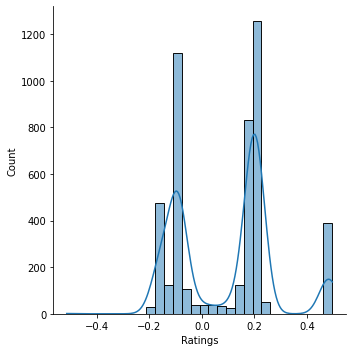

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
# 많은 final_svd_df 기준 score 값 분포
plt.figure(figsize=(8, 4))
sns.displot(final_svd_df['score'], bins=30, kde=True)
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

In [14]:
### 학습데이터 포멧팅 from DataFrame
from surprise.model_selection import train_test_split


r_min = float(final_svd_df['score'].min())
r_max = float(final_svd_df['score'].max())
reader = Reader(rating_scale=(r_min, r_max))
data = Dataset.load_from_df(final_svd_df,reader) #full_result_amend 구현해야 함

trainset, testset = train_test_split(data, test_size=0.25, random_state=0)
# trainset = data.build_full_trainset()
# testset = trainset.build_testset()

algo = SVD()

### trainset으로 SVD 학습
algo.fit(trainset)

In [15]:
### testset으로 RMSE 측정
predictions = algo.test(testset)
accuracy.rmse(predictions)

RMSE: 0.1279


0.1279292481699879

In [16]:
from surprise.model_selection import GridSearchCV, cross_validate

param_grid = {'n_factors': [50, 75], 'lr_all': [0.5, 0.05], 'reg_all': [0.06, 0.04]} 
gs = GridSearchCV(algo_class=SVD, measures=['RMSE'], param_grid=param_grid) 
gs.fit(data) 
print('\n###################') 
print('Best Score :', gs.best_score['rmse']) 
print('Best Parameters :', gs.best_params['rmse']) 
print('#####################')


###################
Best Score : 0.09099730637815309
Best Parameters : {'n_factors': 50, 'lr_all': 0.5, 'reg_all': 0.04}
#####################


In [17]:
#최적의 파라메터로 최종 모델 생성
best_params = gs.best_params['rmse']

final_algo = SVD(n_factors=best_params['n_factors'], lr_all=best_params['lr_all'], reg_all=best_params['reg_all'])

### SVD 학습
final_algo.fit(trainset)

### 최종으로 RMSE 측정
predictions = final_algo.test(testset)
accuracy.rmse(predictions)

RMSE: 0.0917


0.09167886498265658

In [ ]:
# # 순서가 보장됨 
# import collections
# predictions=list(map(dict, collections.OrderedDict.fromkeys(tuple(sorted(d.items())) for d in predictions)))
# predictions

In [18]:
#모델값 확인
pd.DataFrame(predictions)

,uid,iid,r_ui,est,details
0,18864,85214,0.203676,0.130354,{'was_impossible': False}
1,17617,81782,0.487199,0.497035,{'was_impossible': False}
2,15656,81997,0.226745,0.191607,{'was_impossible': False}
3,17617,664,0.489509,0.497035,{'was_impossible': False}
4,15656,81015,-0.147417,-0.091592,{'was_impossible': False}
...,...,...,...,...,...
1166,18864,81195,-0.098676,-0.093766,{'was_impossible': False}
1167,6501,472,-0.083223,0.044955,{'was_impossible': False}
1168,23456,678,-0.083644,-0.038480,{'was_impossible': False}
1169,22774,84318,-0.016945,0.242070,{'was_impossible': False}


In [19]:
pd.DataFrame(predictions).groupby('uid').mean().sort_values('est',ascending=False).head(5)

,r_ui,est
uid,,
17617,0.472288,0.424148
22774,0.084200,0.134545
15656,0.065924,0.080032
18864,0.080095,0.072001
11052,0.069321,0.064387


In [20]:
pd.DataFrame(predictions).groupby('uid').mean().sort_values('est',ascending=False).tail(5)

,r_ui,est
uid,,
23456,0.032026,0.055524
20961,0.052230,0.052639
6501,0.053146,0.041087
7940,0.041371,0.033993
19876,0.056989,0.023187


In [21]:
#상위 n개 출력하기

def get_top_n(predictions, n=10):
    # 각 사용자의 예측데이터를 defaultdict에 저장
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # 정렬 후 Top N 개만 저장
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [22]:
topNresults = get_top_n(predictions, 3)

In [ ]:
# 보편성 점수 근거한 추천율 높은 사람3명

In [35]:
user[user['num']==17617]

,num,sex,study,job,house_owner,marrige,mb_7,mb_8,mb_9,mb_10,mb_11,income,illness,mil_award,support,age,home1_t,home1_b,home2_t,home2_b,home_diff_is,age_cat
5005,17617,M,기타,구직자,세대원,미혼,없다,no,no,해당없음,해당없음,중위소득 40% 이하,no,no,취업 지원,27,광주,북구,광주,북구,0,2030


In [24]:
topNresults[17617]

[('81782', 0.49703465183057716),
 ('664', 0.49703465183057716),
 ('795', 0.49703465183057716)]

In [29]:
topNresults[22774]

[('84979', 0.2995742500013254),
 ('81811', 0.2860844256991051),
 ('87696', 0.27434902852378656)]

In [30]:
topNresults[15656]

[('81811', 0.24402486975258483),
 ('488', 0.23811374476336564),
 ('84981', 0.23444368462213544)]

In [ ]:
# 보편성 점수 근거한 추천율 낮은 사람3명

In [31]:
topNresults[6501]

[('17', 0.22697889734791285),
 ('538', 0.22446572266933773),
 ('488', 0.20953522690742216)]

In [32]:
topNresults[7940]

[('22', 0.18021254827845753),
 ('85221', 0.1759602388562344),
 ('80990', 0.16901244446964683)]

In [33]:
topNresults[19876]

[('11', 0.17572395889452797),
 ('80978', 0.153797164973528),
 ('614', 0.15361276469804983)]